### AI / ML for designers

# Model for converting from celsius to fahrenheit

### Computational Design class

#### nj.namju@gmail.com

-----
##### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

In [3]:
# data
celsius    = [-40, -10,  0,  8, 15, 22,  38]
fahrenheit = [-40,  14, 32, 46, 59, 72, 100]

In [4]:
import matplotlib.pyplot as plt


In [5]:

step = range(len(celsius))

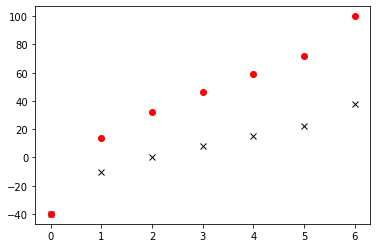

In [6]:
plt.plot(step, celsius, 'x', color='black')
plt.plot(step, fahrenheit, 'o', color='red')

In [7]:
# functions for conversion between celsius and fahrenheit
def celsius2fahrenheit(c):
    return 9.0/5.0 * c + 32

def fahrenheit2celsius(f):
    return (f-32) * 5.0/9.0


In [16]:
sampleA = 38
sampleB = 32

print('celsius:', sampleA, ' to fahrenheit:', celsius2fahrenheit(sampleA))
print('fahrenheit:', sampleB, ' to celsius:', fahrenheit2celsius(sampleB))


celsius: 38  to fahrenheit: 100.4
fahrenheit: 32  to celsius: 0.0


In [17]:

celsiusX    = [[-40], [-10],  [0],  [8], [15], [22],  [38]]
fahrenheitY = fahrenheit[::] # [ -40,    14,   32,   46,   59,   72,   100]

In [18]:
from sklearn.linear_model import LinearRegression 
lrModel =  LinearRegression()
lrModel.fit(celsiusX, fahrenheitY)
print(lrModel.coef_)
print(lrModel.intercept_)

[1.79794911]
31.952525636156476


In [19]:
fahrenheitPred = lrModel.predict(celsiusX)
print('predictions: ', fahrenheitPred)
from sklearn.metrics import r2_score
print(r2_score(fahrenheitPred, fahrenheitY))

predictions:  [-39.96543866  13.97303456  31.95252564  46.3361185   58.92176225
  71.507406   100.27459172]
0.9999637049281158


LinearRegression: ax + b

In [20]:
a = lrModel.coef_
b = lrModel.intercept_
print("coefficient", a)
print("intercept", b)

coefficient [1.79794911]
intercept 31.952525636156476


In [27]:
x = 10
result = a * x + b
print('celsius:', x, ' to fahrenheit:', result)

celsius: 10  to fahrenheit: [49.93201671]


In [28]:
resultFromModel = lrModel.predict([[x]])
print('celsius:', x, ' to fahrenheit:', resultFromModel)

celsius: 10  to fahrenheit: [49.93201671]


In [29]:
minV = -40
maxV = 40
celsiusList = range(minV, maxV)
indexList = range(len(celsiusList))
celsiusList[0]


-40

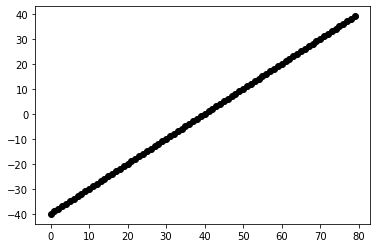

In [30]:
plt.plot(indexList, celsiusList, 'o', color='black');

In [31]:
fahrenheitList = [ celsius2fahrenheit(i) for i in celsiusList]
fahrenheitList[0]

-40.0

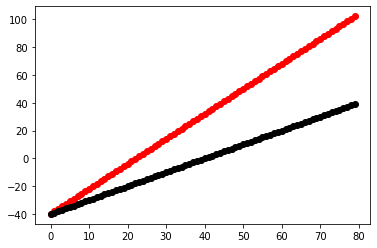

In [32]:
plt.plot(indexList, fahrenheitList, 'o', color='red');
plt.plot(indexList, celsiusList, 'o', color='black');

In [35]:
x = [ [i] for i in celsiusList ]
y = fahrenheitList[:]

In [36]:

from sklearn.linear_model import LinearRegression 
lrModelSecond =  LinearRegression()
lrModelSecond.fit(x, y)

LinearRegression()

In [37]:
a = lrModelSecond.coef_
b = lrModelSecond.intercept_
print("coefficient", a)
print("intercept", b)

coefficient [1.8]
intercept 32.0


In [38]:
predFahrenheit = lrModelSecond.predict(x)
predFahrenheit

array([-40. , -38.2, -36.4, -34.6, -32.8, -31. , -29.2, -27.4, -25.6,
       -23.8, -22. , -20.2, -18.4, -16.6, -14.8, -13. , -11.2,  -9.4,
        -7.6,  -5.8,  -4. ,  -2.2,  -0.4,   1.4,   3.2,   5. ,   6.8,
         8.6,  10.4,  12.2,  14. ,  15.8,  17.6,  19.4,  21.2,  23. ,
        24.8,  26.6,  28.4,  30.2,  32. ,  33.8,  35.6,  37.4,  39.2,
        41. ,  42.8,  44.6,  46.4,  48.2,  50. ,  51.8,  53.6,  55.4,
        57.2,  59. ,  60.8,  62.6,  64.4,  66.2,  68. ,  69.8,  71.6,
        73.4,  75.2,  77. ,  78.8,  80.6,  82.4,  84.2,  86. ,  87.8,
        89.6,  91.4,  93.2,  95. ,  96.8,  98.6, 100.4, 102.2])

In [39]:
from sklearn.metrics import r2_score
print('R²:', r2_score(y, predFahrenheit))

R²: 1.0


In [43]:
import numpy as np  
import pandas as pd 
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense

In [44]:
celsius    = [-40, -10,  0,  8, 15, 22,  38]
fahrenheit = [-40,  14, 32, 46, 59, 72, 100]

In [45]:
X = np.array(celsius , dtype = float)
Y = np.array(fahrenheit, dtype = float)

In [46]:
model =Sequential([
  Dense(units=1, input_shape=[1])
])
model.compile(
  loss = tf.keras.losses.mean_squared_error, # for Regression losses # https://keras.io/api/losses/regression_losses/
  optimizer=tf.keras.optimizers.Adam(0.1), 
  metrics=['mean_squared_error']
  )

In [53]:
history = model.fit(X, Y, epochs = 500, verbose=0)

In [59]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error'])

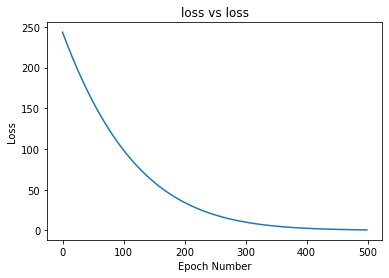

In [60]:
plt.title("loss")
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

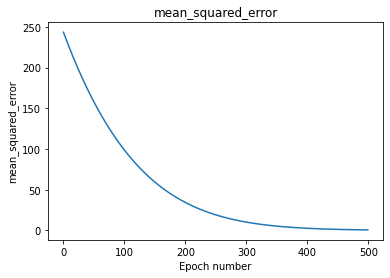

In [64]:
plt.title("mean_squared_error")
plt.xlabel("Epoch number")
plt.ylabel("mean_squared_error")
plt.plot(history.history['mean_squared_error']);

In [97]:
print(model.predict([38]))
print(model.predict([100]))
print(model.predict([-40]))

[[99.77806]]
[[211.64513]]
[[-40.95793]]


In [66]:
print("ground truth:", fahrenheit)
print("prediction: ", model.predict(celsius))


ground truth: [-40, 14, 32, 46, 59, 72, 100]
prediction:  [[-40.95793 ]
 [ 13.171293]
 [ 31.214369]
 [ 45.64883 ]
 [ 58.278984]
 [ 70.909134]
 [ 99.77806 ]]


In [67]:
l0 = tf.keras.layers.Dense(units=8, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

modelSceond = tf.keras.Sequential([l0, l1, l2])
modelSceond.compile(
    loss='mean_squared_error', 
    optimizer=tf.keras.optimizers.Adam(0.1), 
    metrics=['mean_squared_error']
    )
modelSceond.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


Finished training the model
[[211.23093]]


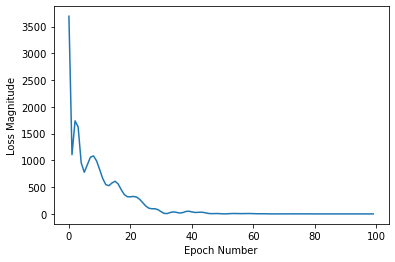

In [68]:
historySecond = modelSceond.fit(X,Y, epochs=100, verbose=False)
print("Finished training the model")

print(modelSceond.predict([100.0]))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(historySecond.history['loss'])

In [71]:
print("ground truth:", fahrenheit)
print("prediction by Big model: ", modelSceond.predict(celsius))
print("prediction: ", model.predict(celsius))

ground truth: [-40, 14, 32, 46, 59, 72, 100]
prediction by Big model:  [[-39.767864 ]
 [ 14.0175905]
 [ 31.946077 ]
 [ 46.288868 ]
 [ 58.838802 ]
 [ 71.38873  ]
 [100.07431  ]]
prediction:  [[-40.95793 ]
 [ 13.171293]
 [ 31.214369]
 [ 45.64883 ]
 [ 58.278984]
 [ 70.909134]
 [ 99.77806 ]]


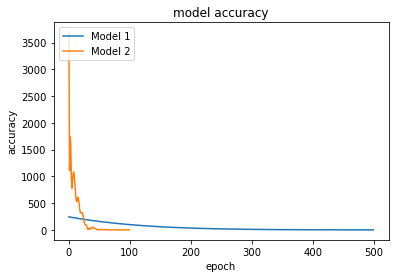

In [70]:
plt.plot(history.history['mean_squared_error']) #mean_squared_error loss
plt.plot(historySecond.history['mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Model 1', 'Model 2'], loc='upper left')
plt.show()

0
1
2
3
4
5
6


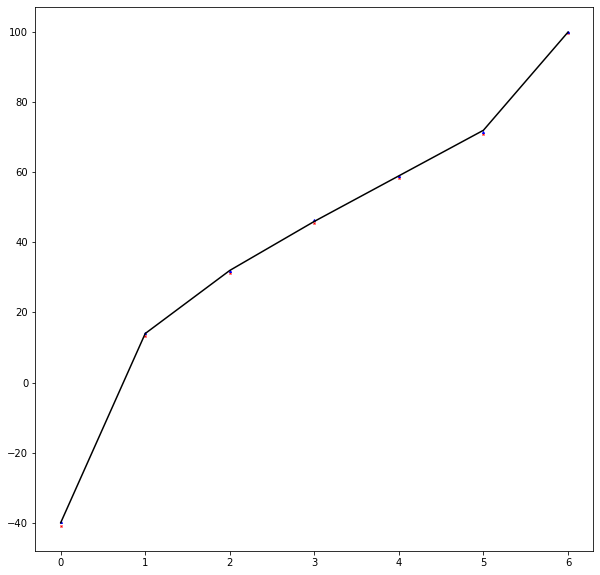

In [86]:
valueA = model.predict(celsius).flatten()
valueB = modelSceond.predict(celsius).flatten()

indexList = []
for i in range(len(valueA)):
    indexList.append(i)

plt.figure(figsize=(10, 10))
plt.plot(indexList, valueA, 'x', color='red', markersize=2);
plt.plot(indexList, valueB, '^', color='blue', markersize=2);
plt.plot(indexList, fahrenheit, '-', color='black', markersize=1);

In [91]:
for i in range(len(fahrenheit)):
    print( valueA[i], "difference: ",fahrenheit[i] - valueA[i])

-40.95793 difference:  0.9579315185546875
13.171293 difference:  0.8287067413330078
31.214369 difference:  0.7856311798095703
45.64883 difference:  0.3511695861816406
58.278984 difference:  0.7210159301757812
70.909134 difference:  1.0908660888671875
99.77806 difference:  0.2219390869140625


In [92]:
for i in range(len(fahrenheit)):
    print( valueB[i], "difference: ",fahrenheit[i] - valueB[i])

-39.767864 difference:  -0.23213577270507812
14.0175905 difference:  -0.01759052276611328
31.946077 difference:  0.05392265319824219
46.288868 difference:  -0.2888679504394531
58.838802 difference:  0.16119766235351562
71.38873 difference:  0.61126708984375
100.07431 difference:  -0.074310302734375


In [96]:
from sklearn.metrics import mean_squared_error # https://en.wikipedia.org/wiki/Mean_squared_error
yTrue = fahrenheit
yPredA = valueA
yPredB = valueB
print(mean_squared_error(yTrue, yPredA))
print(mean_squared_error(yTrue, yPredB))

0.5862905485753019
0.07795756447805095


In [95]:
from sklearn.metrics import r2_score # https://www.investopedia.com/terms/r/r-squared.asp
yTrue = fahrenheit
yPredA = valueA
yPredB = valueB
print(r2_score(yTrue, yPredA))
print(r2_score(yTrue, yPredB))

0.9996624892868701
0.9999551220580908
